<img src='https://www.met.no/om-oss/logo/_/image/73f29cde-219f-487b-809c-9cdd61032c78:2efc46ce776f5f5337c4b0156ae0cbaa3b6bf6fe/width-768/Met_RGB_Horisontal.jpg' width=200 align=right>
<img src='https://raw.githubusercontent.com/norkyst/norkyst-logo/refs/heads/main/png/horizontal_35_91_100.png' width=300 align=right>

# Current flow maps

This notebook will give instructions on how to visualize data from the regional ocean model Norkyst v3, specifically plotting data on maps using `Cartopy`. The data are retrieved from MET's THREDDS server. https://thredds.met.no/thredds/catalog.html


### Python requirements

To access data from the model and extracting it into datasets we will make use of some Python packages.
Xarray will be the main tool to opening the datasets, and allows us to display the contents nicely. Cartopy and matplotlib are the main plotting tools, in addition to Cmocean for colormaps. 

If you are unfamiliar with these packages or need help, please see the documentations listed below.

**Useful documentation**:

* Cartopy: https://scitools.org.uk/cartopy/docs/latest/
* Cmocean: https://matplotlib.org/cmocean/
* Matplotlib: https://matplotlib.org/stable/
* NumPy: https://numpy.org/doc/
* Xarray:https://docs.xarray.dev/en/stable/

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean.cm as cmo
import xarray as xr

### Accessing the data
Data can be found at https://thredds.met.no/thredds/catalog.html.

Locate project, folder and files. Here we will use OPENDAP url to read in the data.
To get the OPENDAP URL, click on the desired NetCDF file (.nc). Under the "ACCESS" section, select the OPENDAP URL and then copy the URL located under "DATA URL".

In [2]:
path = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_his_files/2025/07/24/norkyst800_his_zdepth_20250724T00Z_m00_AN.nc'

ds = xr.open_dataset(path)

In [3]:
ds

<xarray.Dataset>
Dimensions:                  (X: 2747, Y: 1148, depth: 15, time: 24)
Coordinates:
  * X                        (X) int32 0 800 1600 ... 2195200 2196000 2196800
  * Y                        (Y) int32 0 800 1600 2400 ... 916000 916800 917600
  * depth                    (depth) float64 0.0 1.0 2.0 ... 100.0 200.0 300.0
  * time                     (time) datetime64[ns] 2025-07-24 ... 2025-07-24T...
    lat                      (Y, X) float64 ...
    lon                      (Y, X) float64 ...
Data variables:
    forecast_reference_time  datetime64[ns] ...
    projection_stere         int32 ...
    AKs                      (time, depth, Y, X) float32 ...
    Uwind_eastward           (time, Y, X) float32 ...
    Vwind_northward          (time, Y, X) float32 ...
    h                        (Y, X) float64 ...
    salinity                 (time, depth, Y, X) float32 ...
    temperature              (time, depth, Y, X) float32 ...
    u_eastward               (time, depth, Y, X) float32 ...
    v_northward              (time, depth, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    zeta                     (time, Y, X) float32 ...
Attributes: (12/43)
    id:                              f73146dc-0191-4bb1-8cfd-b314aa7c5997
    naming_authority:                no.met
    operational_status:              Operational
    iso_topic_category:              oceans
    activity_type:                   Numerical Simulation
    keywords_vocabulary:             GCMDSK:GCMD Science Keywords:https://gcm...
    ...                              ...
    contributor_name:                Magne Simonsen, Mateusz Matuszak
    contributor_role:                Technical contact, Metadata author
    contributor_email:               magnes@met.no, mateuszm@met.no
    history:                         Thu Jul 24 19:37:46 2025: ncks -O -7 -L ...
    NCO:                             netCDF Operators version 4.8.1 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

### Get to know the dataset

Above we see our dataset with it's dimensions, coordinates, data variables and attributes. The data variables are typically what we are interested in plotting, whereas the coordinates serves where on the grid the data belongs.
Data from Norkyst contains many data variables, many might be unknown to you. A good start is to check the attributes of the variables interesting to you, you can find the longer name for the variable as well as the units using the drop down menu in the display above. 

A variable is accessed by: `ds.name_of_variable`. This produces an Xarray DataArray, whereas `ds` still is an Xarray DataSet. `ds.name_of_variable.values` makes a regular array, however this is often computationally costly without specifying some dimensions, as the size of the array alone often is very large. This can easily be overcome by using the Xarray functions `.sel()`or `.isel()`. These functions returns objects of type Xarray DataArray, where the data is indexed along the chosen dimension.

In [6]:
# .sel() lets you select the dimensions by value
ds.salinity.sel(time='2025-07-24T00:00', depth=7)

<xarray.DataArray 'salinity' (Y: 1148, X: 2747)>
[3153556 values with dtype=float32]
Coordinates:
  * X        (X) int32 0 800 1600 2400 3200 ... 2194400 2195200 2196000 2196800
  * Y        (Y) int32 0 800 1600 2400 3200 ... 915200 916000 916800 917600
    depth    float64 7.0
    time     datetime64[ns] 2025-07-24
    lat      (Y, X) float64 ...
    lon      (Y, X) float64 ...
Attributes:
    grid:           grid
    location:       face
    field:          salinity, scalar, series
    grid_mapping:   projection_stere
    long_name:      Sea water salinity
    standard_name:  sea_water_salinity
    units:          1e-3
    time:           time
    minmax:         10 40
    _ChunkSizes:    [   1    1   24 2747]

In [7]:
# .isel() lets you select the dimensions by index
ds.salinity.isel(time=0, depth=5)

<xarray.DataArray 'salinity' (Y: 1148, X: 2747)>
[3153556 values with dtype=float32]
Coordinates:
  * X        (X) int32 0 800 1600 2400 3200 ... 2194400 2195200 2196000 2196800
  * Y        (Y) int32 0 800 1600 2400 3200 ... 915200 916000 916800 917600
    depth    float64 7.0
    time     datetime64[ns] 2025-07-24
    lat      (Y, X) float64 ...
    lon      (Y, X) float64 ...
Attributes:
    grid:           grid
    location:       face
    field:          salinity, scalar, series
    grid_mapping:   projection_stere
    long_name:      Sea water salinity
    standard_name:  sea_water_salinity
    units:          1e-3
    time:           time
    minmax:         10 40
    _ChunkSizes:    [   1    1   24 2747]

Datasets from Norkyst v3 contains hourly data, with 24 time steps. To open mutliple datasets, for instance to look at a timeseries longer than one day, use: `xr.open_mfdataset(paths, combine='by_coords')`.

The time variable of the dataset has a datetime format.

### Plotting data on maps

In this example we will plot an excerpt of the model, projected on a map using Cartopy. In Cartopy, the projection determines what the map will look like while the transformaion tells the program which coordinate system your data is in. Our data is in longitude and latitude, so the transformation argument in the plotting function should be: `transform=ccrs.PlateCarree()`. Matplotlib is the main tool for plotting, but we will make use of cmocean for the color schemes.

The example below shows how to plot the potential temperature and streamlines for currents in an area of the model, with an overview map to it's right.

In [8]:
# Defining a focus area to plot
lat_area = [65, 63, 63, 65, 65]
lon_area = [7, 7, 10, 10, 7]

In [24]:
# Time and depth indices
time_idx = 0
depth_idx = 0

In [25]:
# Grid coordinates
lat = ds.lat.values
lon = ds.lon.values

# Current velocity components
u = ds.u_eastward.isel(time=time_idx, depth=depth_idx)
v = ds.v_northward.isel(time=time_idx, depth=depth_idx)

Text(0.5, 1.0, 'The Norkyst model domain')

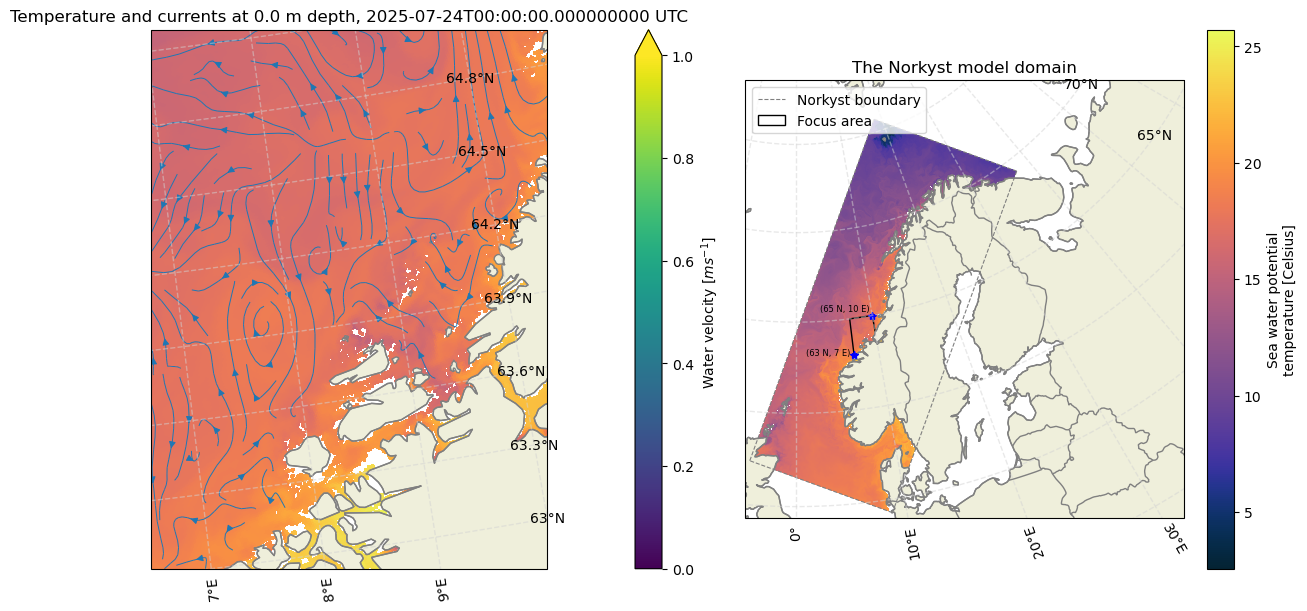

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection':ccrs.NorthPolarStereo()}, constrained_layout=True)

# Set the extent of the axes
axs[0].set_extent([np.min(lon_area), np.max(lon_area), np.min(lat_area), np.max(lat_area)], crs=ccrs.PlateCarree())  # This will show our focus area
axs[1].set_extent([np.min(ds.lon.values), np.max(ds.lon.values), np.min(ds.lat.values), np.max(ds.lat.values)], crs=ccrs.PlateCarree())  # This will show an overview

# Add natural features
land = cfeature.NaturalEarthFeature(category='physical', name='land', scale='10m', edgecolor='gray', facecolor=cfeature.COLORS['land'])
coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='10m', edgecolor='gray', facecolor='none')

axs[0].add_feature(land)
axs[0].add_feature(coastline)

# As the overview map shows a larger area, we can use a coarser resolution for the land/coastline
land = cfeature.NaturalEarthFeature(category='physical', name='land', scale='50m', edgecolor='gray', facecolor=cfeature.COLORS['land'])
coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='50m', edgecolor='gray', facecolor='none')
borders = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', edgecolor= 'gray', scale='50m', facecolor='none')

axs[1].add_feature(land)
axs[1].add_feature(coastline)
axs[1].add_feature(borders)

# Add gridlines
for ax in axs:
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='lightgray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Disable top labels
    gl.right_labels = False  # Disable right labels
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# Map 1
# Potential temperature field
ds.temperature.isel(time=time_idx, depth=depth_idx).plot(ax=axs[0], x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cmo.thermal, add_colorbar=False)

# Plot streamlines
sp = axs[0].streamplot(lon, lat, u, v, transform=ccrs.PlateCarree(), cmap=cmo.speed, linewidth=0.7)
# Adding colorbar for the streamlines
cbar = plt.colorbar(sp.lines, ax=axs[0], orientation='vertical', pad=0.2, extend='max', label='Water velocity $[ms^{-1}]$')

# Map 2
# Plotting the boundaries of the model
axs[1].plot(lon[0,:], lat[0,:], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8)
axs[1].plot(lon[-1,:], lat[-1,:], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8)  
axs[1].plot(lon[:,0], lat[:,0], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8)
axs[1].plot(lon[:,-1], lat[:,-1], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8, label='Norkyst boundary')

# Plot temperature field
ds.temperature.isel(time=time_idx, depth=depth_idx).plot(ax=axs[1], x='lon', y='lat', transform=ccrs.PlateCarree(), cmap=cmo.thermal)

# Add box to mark the area plotted in the first map
axs[1].fill(lon_area, lat_area, transform=ccrs.PlateCarree(), color='none', edgecolor='black', linewidth=1, label='Focus area')

# Add markers
axs[1].plot(lon_area[2], lat_area[0], transform = ccrs.PlateCarree(), color = 'blue', marker ='*', markersize=6) # blue stars
axs[1].plot(lon_area[0], lat_area[1], transform = ccrs.PlateCarree(), color = 'blue', marker ='*', markersize=6)

# Add text
axs[1].text(lon_area[2] - 0.25, lat_area[0] + 0.25, '(65 N, 10 E)', horizontalalignment='right', transform=ccrs.PlateCarree(), color = 'black', fontsize = 6)
axs[1].text(lon_area[0] - 0.5, lat_area[1], '(63 N, 7 E)', horizontalalignment='right', transform=ccrs.PlateCarree(), color = 'black', fontsize = 6)

axs[1].legend(loc='upper left')

# Add title
axs[0].set_title(f'Temperature and currents at {ds.depth[depth_idx]:.1f} m depth, {ds.time[time_idx]} UTC')
axs[1].set_title('The Norkyst model domain')

For examples on how to retrieve time series and information from a single point, see the notebook `timeseries.ipynb`.